In [2]:
!pip install -q lucid>=0.2.3

In [3]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [4]:
##################### MIDPOINT LINE ALGORITHM as MPL
def Draw_Pixel(x,y):
  value_x=x/1000
  value_y=y/1000
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(value_x,value_y)
  gl.glEnd()

def Original_Zone(x1,y1,x2,y2):
    dx=x2-x1
    dy=y2-y1
    if abs(dx)>=abs(dy):
        if dx>=0 and dy>=0:
            return "zone-0"
        if dx<0 and dy>=0:
            return "zone-3"
        if dx<0 and dy<0:
            return "zone-4"
        if dx>=0 and dy<0:
            return "zone-7"
    else:
        if dx>=0 and dy>=0:
            return "zone-1"
        if dx<0 and dy>=0:
            return "zone-2"
        if dx<0 and dy<0:
            return "zone-5"
        if dx>=0 and dy<0:
            return "zone-6"

def Converting_into_zone0(x1,y1,x2,y2,zone):
    if zone=="zone-0":
        x1,y1=x1,y1
        x2,y2=x2,y2
        converted=[x1,y1,x2,y2]
        return converted
    if zone=="zone-1":
        x1,y1=y1,x1
        x2,y2=y2,x2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-2":
        x1,y1=y1,-x1
        x2,y2=y2,-x2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-3":
        x1,y1=-x1,y1
        x2,y2=-x2,y2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-4":
        x1,y1=-x1,-y1
        x2,y2=-x2,-y2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-5":
        x1,y1=-y1,-x1
        x2,y2=-y2,-x2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-6":
        x1,y1=-y1,x1
        x2,y2=-y2,x2
        converted = [x1, y1, x2, y2]
        return converted
    if zone=="zone-7":
        x1,y1=x1,-y1
        x2,y2=x2,-y2
        converted = [x1, y1, x2, y2]
        return converted
def Converting_Back_to_Original_Zone(x,y,zone):
    if zone=="zone-0":
        x,y=x,y
        return [x,y]
    if zone=="zone-1":
        x,y=y,x
        return [x, y]
    if zone=="zone-2":
        x,y=-y,x
        return [x, y]
    if zone=="zone-3":
        x,y=-x,y
        return [x, y]
    if zone=="zone-4":
        x,y=-x,-y
        return [x, y]
    if zone=="zone-5":
        x,y=-y,-x
        return [x, y]
    if zone=="zone-6":
        x,y=y,-x
        return [x, y]
    if zone=="zone-7":
        x,y=x,-y
        return [x, y]
 
def Draw_Line(x1,y1,x2,y2,zone):
    dx=x2-x1
    dy=y2-y1
    d=2*dy-dx
    incE=2*dy
    incNE=2*(dy-dx)
    x=x1
    y=y1
    while x<x2:
        x=x+1
        if d>0:
            d=d+incNE
            y=y+1
            #print("north east")
        else:
            d=d+incE
            #print("east")
        values=Converting_Back_to_Original_Zone(x,y,zone)
        Draw_Pixel(values[0],values[1])

def MPL(x1,y1,x2,y2):
  zone=Original_Zone(x1,y1,x2,y2)
  values=Converting_into_zone0(x1,y1,x2,y2,zone)
  Draw_Line(values[0],values[1],values[2],values[3],zone)




In [5]:
##################### MIDPOINT CIRCLE ALGORITHM as MPC
def Draw_Pixel(x,y):
  X=x/1000
  Y=y/1000
  gl.glBegin(gl.GL_POINTS)
  gl.glVertex2f(X,Y)
  gl.glEnd()

def MPC(radius,cx,cy): 
    x=0
    y=radius
    d =(5/4)-radius
    while x<=y:
        if d<0:
            #east
            d=d+(2*x)+3
            x+=1
        else:
            #south-east
            d=d+2*(x-y)+5
            x+=1
            y-=1
        Draw_Pixel(cx+x,cy+y)
        Draw_Pixel(cx+y,cy+x)
        Draw_Pixel(cx+y,cy-x)
        Draw_Pixel(cx+x,cy-y)
        Draw_Pixel(cx-x,cy-y)
        Draw_Pixel(cx-y,cy-x)
        Draw_Pixel(cx-y,cy+x)
        Draw_Pixel(cx-x,cy+y)

How is the weather (suuny/cloudy): sunny
What's the time (from 5 to 19 as 24 hour clock time): 12
Is it Raining (yes/no): yes
The boat's position (-1000 to 1000): 500


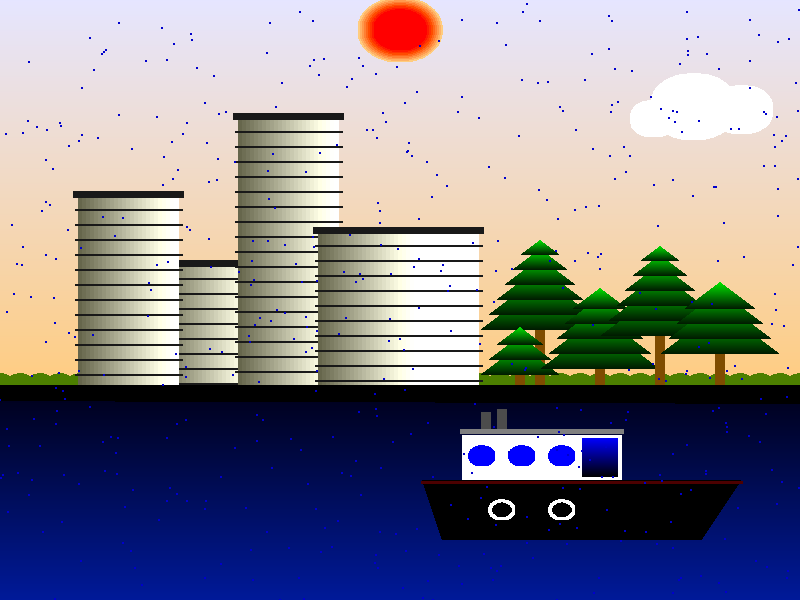

In [6]:
import random 
import math

gl.glPointSize(7)
gl.glClear(gl.GL_COLOR_BUFFER_BIT)

weather=str.lower(str(input("How is the weather (sunny/cloudy): ")))
time=int(input("What's the time (from 5 to 19 as 24 hour clock time): "))
rain=str.lower(str(input("Is it Raining (yes/no): ")))
boat_position=int(input("The boat's position (-1000 to 1000): "))

######### Calculating Sun postition with Transformation (Rotation Matrix)

theta=(time-6)*(180/12)
a = math.cos(math.radians(theta))
b = math.sin(math.radians(theta))

v1 = np.array([[0.9],
              [0],
              [1]])

rotation = np.array([[a, -b, 0],
             [b, a, 0],
             [0, 0, 1]])

v11 = np.matmul(rotation,v1)

xpos=1000*(v11[0][0])
ypos=1000*(v11[1][0])


######################################### Sky Background Codes

if weather=="sunny":
  gl.glBegin(gl.GL_QUADS)
  gl.glColor3f(0.9,0.9,1)
  gl.glVertex2f(-1,1)
  gl.glColor3f(0.9,0.9,1)
  gl.glVertex2f(1,1)
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(1,-.3)
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(-1,-.3)
  gl.glEnd()


  ######################## Sun (xpos, ypos from Rotation Matrix)
  r=1
  g=0.8
  b=0.5
  rad=100
  gl.glPointSize(5)
  for i in range(20):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,ypos)
    rad-=5
    g-=0.1
    b-=0.1

  ####################### Horizon
  x=-1000
  gl.glPointSize(3)
  for i in range(42):
    rad=30
    for i in range(10):
      gl.glColor3f(0.3,0.5,0)
      MPC(rad,x,-280)
      rad-=3
    x+=50


  ############################################ Clouds
  gl.glColor3f(1,1,1)
  gl.glPointSize(7)

  ###loop for number of clouds
  for i in range(1):
    x=random.uniform(-800,800)
    y=random.uniform(600,700)
    ###loop for inner filling of cloud circles
    r=50 #radious
    for i in range(5):
      MPC(r,x-100,y)
      r-=10
    r=100 #radious
    for i in range(10):
      MPC(r,x,y+40)
      r-=10
    r=70 #radious
    for i in range(7):
      MPC(r,x+120,y+30)
      r-=10

elif weather=="cloudy":
  gl.glBegin(gl.GL_QUADS)
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(-1,1)
  gl.glColor3f(1,0.8,0.5)
  gl.glVertex2f(1,1)
  gl.glColor3f(0.5,0.35,0.35)
  gl.glVertex2f(1,-.3)
  gl.glColor3f(0.5,0.35,0.35)
  gl.glVertex2f(-1,-.3)
  gl.glEnd()

  
  ########################### Sun (xpos, ypos from Rotation Matrix)
  r=0.9   #RGB values
  g=0.7
  b=0.4
  rad=100
  gl.glPointSize(5)
  for i in range(20):
    gl.glColor3f(r,g,b)
    MPC(rad,xpos,ypos)
    rad-=5
    g-=0.1
    b-=0.1

  ####################### Horizon
  x=-1000
  gl.glPointSize(3)
  for i in range(42):
    rad=30
    for i in range(10):
      gl.glColor3f(0.3,0.5,0)
      MPC(rad,x,-280)
      rad-=3
    x+=50

  ############################################ Clouds
  gl.glColor3f(.2,.2,.2)
  gl.glPointSize(7)
  ###loop for number of clouds
  for i in range(3):
    x=random.uniform(-800,800)
    y=random.uniform(600,700)
    ###loop for inner filling of cloud circles
    r1=50 #radious
    r2=100
    r3=70 
    for i in range(10):
      MPC(r1,x-100,y)
      MPC(r2,x,y)
      MPC(r3,x+120,y)
      r1-=10
      r2-=10
      r3-=10





else:
  print('Please run again & Enter Sunny or Cloudy')


############################################# Building function created & Called
def Building(n_width,x_position,y_height):
  r=.4
  g=.4
  b=.3
  x=x_position
  y_height=y_height-300  #baseline at (x,-300)

  ###### The MPL is running in the for loop according n_width times
  for i in range(n_width):
    gl.glPointSize(5)
    gl.glColor3f(r,g,b)
    MPL(x_position,y_height,x_position,-300)
    x_position+=10
    r+=0.03
    g+=0.03
    b+=0.03

  ###### Top border of buildings
  gl.glColor3f(.1,.1,.1)
  gl.glPointSize(7)
  MPL(x-10,y_height,x_position,y_height)

  while y_height>-300:
    gl.glPointSize(2)
    MPL(x-10,y_height,x_position+5,y_height)
    y_height-=50

Building(30,-600,420)
Building(25,-800,650)
Building(25,-400,910)
Building(40,-200,530)

################################### Tree
def Tree(step,scale,translate_x,translate_y):
  tx=translate_x/1000
  ty=translate_y/1000
  s=scale

  ## Ideal values taken for Transformtion
  v1 = np.array([[0],
              [0.1],
              [1]])
  v2 = np.array([[-0.1],
              [0],
              [1]])
  v3 = np.array([[0.1],
              [0],
              [1]])
  #Tree trunk
  gl.glColor3f(0.5,0.3,.0)
  gl.glPointSize(10)
  MPL(translate_x,translate_y,translate_x,-300)

  for i in range(step):
    #translated_Scaling_Matrix
    ts = np.array([[s, 0, tx],
             [0, s, ty],
             [0, 0, 1]])
  
    v11 = np.matmul(ts,v1)
    v22 = np.matmul(ts,v2)
    v33 = np.matmul(ts,v3)
    #Tree triangle
    gl.glBegin(gl.GL_TRIANGLES)
    gl.glColor3f(0,0.9,.0)
    gl.glVertex2f(v11[0][0],v11[1][0])
    gl.glColor3f(0,0.1,0)
    gl.glVertex2f(v22[0][0],v22[1][0])
    gl.glColor3f(0,0.1,0)
    gl.glVertex2f(v33[0][0],v33[1][0])
    gl.glEnd()
    
    ty+=0.05
    s-=0.2

Tree(6,1.5,350,-100)    
Tree(3,1,300,-250)
Tree(5,1.5,500,-230)
Tree(6,1.5,650,-120)
Tree(4,1.5,800,-180)

######## River Water 
gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,0.1)
gl.glVertex2f(-1,-0.3)
gl.glColor3f(0,0,0.1)
gl.glVertex2f(1,-0.3)
gl.glColor3f(0,0.1,0.6)
gl.glVertex2f(1,-1)
gl.glColor3f(0,0.1,0.6)
gl.glVertex2f(-1,-1)
gl.glEnd()

####### River upper ash color border
gl.glPointSize(10)
gl.glColor3f(0,0,0)
MPL(-1000,-300,1000,-300)
MPL(-1000,-320,1000,-330)






########################## Boat
x=boat_position/1100
y=-0.7
#### Lower part (Black)
gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,0)
gl.glVertex2f(x-0.4,y+0.1)
gl.glVertex2f(x+0.4,y+0.1)
gl.glVertex2f(x+0.3,y-0.1)
gl.glVertex2f(x-0.35,y-0.1)
gl.glEnd()

### upper part (White)
gl.glBegin(gl.GL_QUADS)
gl.glColor3f(1,1,1)
gl.glVertex2f(x-0.3,y+0.25)
gl.glVertex2f(x+0.1,y+0.25)
gl.glVertex2f(x+0.1,y+0.1)
gl.glVertex2f(x-0.3,y+0.1)
gl.glEnd()

### Gradiant window (Blue-Black)
gl.glBegin(gl.GL_QUADS)
gl.glColor3f(0,0,1)
gl.glVertex2f(x-0,y+0.24)
gl.glVertex2f(x+0.09,y+0.24)
gl.glColor3f(0,0,0)
gl.glVertex2f(x+0.09,y+0.11)
gl.glVertex2f(x-0,y+0.11)
gl.glEnd()


xx=x*1000   ### Converting for MPL & MPC, as they have -1000 to 1000 range.
yy=y*1000

## Funnel
gl.glPointSize(10)
gl.glColor3f(0.3,0.3,0.3)
MPL(xx-240,yy+280,xx-240,yy+310)
MPL(xx-200,yy+280,xx-200,yy+320)
gl.glPointSize(5)
gl.glColor3f(0.5,0.5,0.5)
MPL(xx-300,yy+260,xx+100,yy+260)

## Circular windows (Blue)
gl.glPointSize(3)
gl.glColor3f(0,0,1)
rad=30
for i in range(5):
  MPC(rad,xx-250,yy+180)
  MPC(rad,xx-150,yy+180)
  MPC(rad,xx-50,yy+180)
  rad-=6

## Red border & white circle window
gl.glColor3f(1,1,1)
gl.glPointSize(3)
MPC(30,xx-50,yy)
MPC(30,xx-200,yy)
gl.glColor3f(0.3,0,0)
MPL(xx-400,yy+90,xx+400,yy+90)

########################################## Rain
if rain=="yes": 
  gl.glPointSize(2)
  gl.glColor3f(0,0,0.8)
  gl.glBegin(gl.GL_POINTS)
  for i in range(500):
    a=random.uniform(-1,1)
    b=random.uniform(1,-1)
    gl.glVertex2f(a,b)
  gl.glEnd()


from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))